In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3,4,5,6,7"
os.environ["GRADIO_TEMP_DIR"] = "/local_data/cx2219/gradio_temp"


In [2]:
import os
import uuid
import imageio
import numpy as np
from IPython.display import Image as ImageDisplay

from inference import Inference, ready_gaussian_for_video_rendering, load_image, load_masks, display_image, make_scene, render_video, interactive_visualizer

/local_data/cx2219/miniconda3/envs/sam3d-objects/lib/python3.11/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Warp 1.10.0 initialized:
   CUDA Toolkit 12.8, Driver 12.9
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
     "cuda:1"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
     "cuda:2"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
     "cuda:3"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
     "cuda:4"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
     "cuda:5"   : "NVIDIA RTX 6000 Ada Generation" (47 GiB, sm_89, mempool enabled)
   CUDA peer access:
     Supported fully (all-directional)
   Kernel cache:
     /home/cx2219/.cache/warp/1.10.0


2025-11-22 14:12:05.175 | INFO     | sam3d_objects.pipeline.inference_pipeline:set_attention_backend:15 - GPU name is NVIDIA RTX 6000 Ada Generation


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2025-11-22 14:12:06.499 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.sparse:__from_env:39 - [SPARSE] Backend: spconv, Attention: sdpa
nvcc warning : incompatible redefinition for option 'compiler-bindir', the last value of this option was used
2025-11-22 14:12:09.509 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.attention:__from_env:30 - [ATTENTION] Using backend: sdpa
2025-11-22 14:12:09.670 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2025-11-22 14:12:09.671 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 


[SPARSE][CONV] spconv algo: auto


In [3]:
PATH = os.getcwd()
TAG = "hf"
config_path = f"{PATH}/../checkpoints/{TAG}/pipeline.yaml"
inference = Inference(config_path, compile=False)

2025-11-22 14:40:03.142 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
/local_data/cx2219/miniconda3/envs/sam3d-objects/lib/python3.11/site-packages/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")
2025-11-22 14:40:12.168 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2025-11-22 14:40:12.170 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:98 - self.device: cuda
2025-11-22 14:40:12.171 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:99 - CUDA_VISIBLE_DEVICES: 2,3,4,5,6,7
2025-11-22 14:40:12.171 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:100 - Actually using GPU: 0
2025-11-22 14:40:12.1

In [5]:
from inference import load_mask

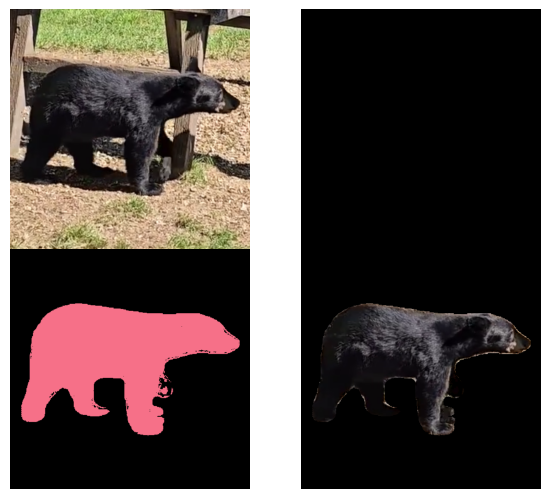

In [7]:
image_folder = "/mnt/NAS/home/cx2219/animal4d/preivew/bear/2AyBtNUWgg0_109_001"
example_image_path = os.path.join(image_folder, "/mnt/NAS/home/cx2219/animal4d/preivew/bear/vDkYbaLgnQ0_002_003/00000100_rgb.png")
example_mask_path = os.path.join(image_folder, "/mnt/NAS/home/cx2219/animal4d/preivew/bear/vDkYbaLgnQ0_002_003/00000100_rgb_masked.png")

image = load_image(example_image_path)
mask = [load_mask(example_mask_path)]
display_image(image, mask)



In [9]:
outputs = inference(image, mask[0], seed=42)

2025-11-23 03:09:03.248 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:662 - Sampling sparse structure: inference_steps=25, strength=7, interval=[0, 500], rescale_t=3, cfg_strength_pm=0.0
2025-11-23 03:09:03.253 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:631 - Running condition embedder ...
2025-11-23 03:09:03.331 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:635 - Condition embedder finishes!
2025-11-23 03:09:07.047 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:712 - Downsampled coords from 9257 to 9244
2025-11-23 03:09:07.066 | INFO     | sam3d_objects.pipeline.inference_pipeline_pointmap:run:368 - Rescaling scale by 1 after downsampling
2025-11-23 03:09:07.070 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_slat:742 - Sampling sparse latent: inference_steps=25, strength=1, interval=[0, 500], rescale_t=1
2025-11-23 03:09:07.070 | INFO     | sam3d

In [17]:
for key in outputs:
    print(f"{key}: {type(outputs[key])}")

6drotation_normalized: <class 'torch.Tensor'>
scale: <class 'torch.Tensor'>
shape: <class 'torch.Tensor'>
translation: <class 'torch.Tensor'>
translation_scale: <class 'torch.Tensor'>
coords_original: <class 'torch.Tensor'>
coords: <class 'torch.Tensor'>
downsample_factor: <class 'int'>
rotation: <class 'torch.Tensor'>
mesh: <class 'list'>
gaussian: <class 'list'>
glb: <class 'trimesh.base.Trimesh'>
gs: <class 'sam3d_objects.model.backbone.tdfy_dit.representations.gaussian.gaussian_model.Gaussian'>
pointmap: <class 'torch.Tensor'>
pointmap_colors: <class 'torch.Tensor'>
tensor([[-0.0142,  0.0146,  2.3644]], device='cuda:0')


In [21]:
print(outputs["mesh"])